<a href="https://colab.research.google.com/github/mafaldasalomao/binary_classification_breast_cancer/blob/main/Porj06_classification_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import torch
import numpy as np
from torch import nn, optim
import torch.nn.functional as F
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
torch.__version__

'1.12.1+cu113'

In [2]:
np.random.seed(42)
torch.manual_seed(42)

In [4]:
base = pd.read_csv('/content/iris.csv')

In [5]:
base.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


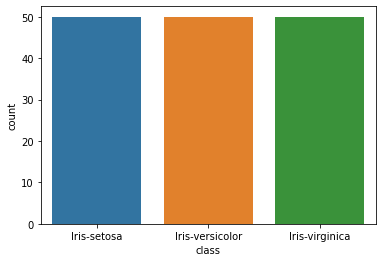

In [9]:
sns.countplot(base['class']);

In [17]:
previsores = base.iloc[:, 0:4].values
classe = base.iloc[:, 4].values
previsores.shape, classe.shape

((150, 4), (150,))

In [18]:
#One hot encode our dataframe
insurance_one_hot = pd.get_dummies(classe)

In [19]:
insurance_one_hot

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [12]:
np.unique(base['class'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [25]:
encoder = LabelEncoder()
classe = encoder.fit_transform(classe)
classe



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
previsores_train, previsores_test, classe_train, classe_test = train_test_split(previsores,
                                                                                classe,
                                                                                test_size=0.2)

In [27]:
previsores_train = torch.tensor(previsores_train, dtype=torch.float)
classe_train = torch.tensor(classe_train,  dtype=torch.long)

In [30]:
# 4-> 4-> 4-> 3
classificador = nn.Sequential(
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 3)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(previsores_train, classe_train), batch_size=32, shuffle=True)

In [33]:
for epoch in range(1000):
  running_loss = 0
  running_accuracy = 0.
  for data in train_loader:
    inputs, labels = data
    
    optimizer.zero_grad()
    outputs = classificador.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()


    outputs = F.softmax(outputs)

    top_p, top_class = outputs.topk(k = 1, dim = 1)

    equals = top_class == labels.view(*top_class.shape)

    running_accuracy += torch.mean(equals.type(torch.float))

    optimizer.step()

    running_loss += loss.item()

  print('Época %3d: perda %.5f - accuracy %.5f' % (epoch + 1, running_loss/len(train_loader),
        running_accuracy/len(train_loader)))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


Época   1: perda 0.78648 - accuracy 0.63542
Época   2: perda 0.78002 - accuracy 0.63542
Época   3: perda 0.77487 - accuracy 0.63281
Época   4: perda 0.76888 - accuracy 0.63281
Época   5: perda 0.76224 - accuracy 0.64062
Época   6: perda 0.75787 - accuracy 0.63802
Época   7: perda 0.75318 - accuracy 0.63281
Época   8: perda 0.74756 - accuracy 0.63021
Época   9: perda 0.74096 - accuracy 0.64062
Época  10: perda 0.73765 - accuracy 0.63281
Época  11: perda 0.73508 - accuracy 0.62500
Época  12: perda 0.72731 - accuracy 0.63281
Época  13: perda 0.72009 - accuracy 0.64323
Época  14: perda 0.71761 - accuracy 0.63021
Época  15: perda 0.71173 - accuracy 0.63802
Época  16: perda 0.70800 - accuracy 0.63021
Época  17: perda 0.70364 - accuracy 0.63021
Época  18: perda 0.70070 - accuracy 0.62500
Época  19: perda 0.69264 - accuracy 0.63542
Época  20: perda 0.68707 - accuracy 0.64062
Época  21: perda 0.67916 - accuracy 0.64583
Época  22: perda 0.68117 - accuracy 0.63021
Época  23: perda 0.67849 - accur

In [ ]:
classificador.eval()

In [35]:
previsores_test = torch.tensor(previsores_test, dtype = torch.float)

In [37]:
previsoes = classificador(previsores_test)

In [38]:
previsoes

tensor([[-11.0448,   4.2010,   1.8696],
        [  8.0308,   3.3719, -10.2567],
        [  8.0308,   3.3719, -10.2567],
        [  8.0308,   3.3719, -10.2567],
        [-18.0054,   4.4791,   6.2383],
        [-25.1158,   4.7631,  10.7010],
        [-27.0215,   4.8393,  11.8970],
        [-27.9282,   4.8755,  12.4660],
        [  8.0308,   3.3719, -10.2567],
        [ -9.1386,   4.1248,   0.6733],
        [-20.1548,   4.5649,   7.5873],
        [  8.0308,   3.3719, -10.2567],
        [  8.0308,   3.3719, -10.2567],
        [-21.0668,   4.6014,   8.1597],
        [  8.0308,   3.3719, -10.2567],
        [-15.0999,   4.3630,   4.4147],
        [  8.0308,   3.3719, -10.2567],
        [  8.0308,   3.3719, -10.2567],
        [  8.0308,   3.3719, -10.2567],
        [  8.0308,   3.3719, -10.2567],
        [-17.3795,   4.4541,   5.8454],
        [  8.0308,   3.3719, -10.2567],
        [-22.8970,   4.6745,   9.3083],
        [-20.6416,   4.5844,   7.8928],
        [ -7.5741,   4.0623,  -0.3086],


In [ ]:
0.3049 + 0.3752 + 0.3199

In [39]:
F.softmax(previsoes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([[2.1806e-07, 9.1144e-01, 8.8560e-02],
        [9.9061e-01, 9.3879e-03, 1.1318e-08],
        [9.9061e-01, 9.3879e-03, 1.1318e-08],
        [9.9061e-01, 9.3879e-03, 1.1318e-08],
        [2.5241e-11, 1.4689e-01, 8.5311e-01],
        [2.7786e-16, 2.6308e-03, 9.9737e-01],
        [1.2518e-17, 8.5999e-04, 9.9914e-01],
        [2.8629e-18, 5.0495e-04, 9.9950e-01],
        [9.9061e-01, 9.3879e-03, 1.1318e-08],
        [1.6835e-06, 9.6928e-01, 3.0723e-02],
        [8.5332e-13, 4.6426e-02, 9.5357e-01],
        [9.9061e-01, 9.3879e-03, 1.1318e-08],
        [9.9061e-01, 9.3879e-03, 1.1318e-08],
        [1.9719e-13, 2.7698e-02, 9.7230e-01],
        [9.9061e-01, 9.3879e-03, 1.1318e-08],
        [1.7178e-09, 4.8707e-01, 5.1293e-01],
        [9.9061e-01, 9.3879e-03, 1.1318e-08],
        [9.9061e-01, 9.3879e-03, 1.1318e-08],
        [9.9061e-01, 9.3879e-03, 1.1318e-08],
        [9.9061e-01, 9.3879e-03, 1.1318e-08],
        [6.5624e-11, 1.9919e-01, 8.0081e-01],
        [9.9061e-01, 9.3879e-03, 1

In [40]:
previsoes = [np.argmax(t) for t in previsoes.detach().numpy()]

In [41]:
previsoes

[1,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 2,
 1,
 1]

In [43]:
matriz = confusion_matrix(previsoes, classe_test)
matriz

array([[14,  0,  0],
       [ 0,  5,  0],
       [ 0,  1, 10]])

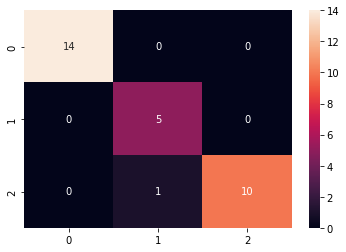

In [44]:
sns.heatmap(matriz, annot=True)